In [113]:
import pandas as pd
import numpy as np
from constants import db_types
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [114]:
malware_data_train = pd.read_csv('new_train.csv', dtype=db_types)

### Id
Botamos el identifier de la maquina ya que no nos es util

In [115]:
malware_data_train = malware_data_train.drop(["MachineIdentifier"], axis=1)

In [116]:
malware_data_train = malware_data_train.drop(["Unnamed: 0"], axis=1)

### Nulls
Las columnas con + 30% null las botamos
NA percentage 
`extraido de exploration.ipybn`
PuaMode                                                        100.0  
Census_ProcessorClass                                           99.6  
DefaultBrowsersIdentifier                                       95.1  
Census_IsFlightingInternal                                      83.0  
Census_InternalBatteryType                                      71.0  
Census_ThresholdOptIn                                           63.4  
Census_IsWIMBootEnabled                                         63.4  
SmartScreen                                                     35.5  
OrganizationIdentifier                                          30.9 

In [117]:
malware_data_train = malware_data_train.drop([
    "PuaMode",
    "Census_ProcessorClass",
    "DefaultBrowsersIdentifier",
    "Census_IsFlightingInternal",
    "Census_InternalBatteryType",
    "Census_ThresholdOptIn",
    "Census_IsWIMBootEnabled",
    "SmartScreen",
    "OrganizationIdentifier",
], axis=1)

In [118]:
malware_data_train.columns

Index(['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsBeta',
       'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'SMode',
       'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_MDC2FormFactor',
       'Census_DeviceFamily', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_I

## Alto count

In [119]:
malware_data_train = malware_data_train.drop([
    "Census_OEMModelIdentifier",
    "Census_FirmwareVersionIdentifier",
    "AvSigVersion",
    "AVProductStatesIdentifier",
    "Census_ProcessorModelIdentifier",
    "Census_OEMNameIdentifier",
    "OsBuildLab",
#     "Census_FirmwareManufacturerIdentifier",
    "Census_OSVersion",
], axis=1)

In [120]:
# Safe
safe_df = malware_data_train.copy()

In [121]:
cat_cols = malware_data_train.select_dtypes(exclude=["number","bool_","object_"]).columns
malware_data_train.select_dtypes(exclude=["number","bool_","object_"])

,ProductName,EngineVersion,AppVersion,Platform,Processor,OsVer,OsPlatformSubRelease,SkuEdition,Census_MDC2FormFactor,Census_DeviceFamily,...,Census_PowerPlatformRoleName,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
0,win8defender,1.1.15100.1,4.10.209.0,windows8,x64,6.3.0.0,windows8.1,Home,AllInOne,Windows.Desktop,...,Desktop,amd64,rs1_release,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,FullAuto,IS_GENUINE,Retail,Retail
1,win8defender,1.1.15200.1,4.10.209.0,windows8,x64,6.3.0.0,windows8.1,Home,Convertible,Windows.Desktop,...,Mobile,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail
2,win8defender,1.1.14405.2,4.11.15063.447,windows10,x64,10.0.0.0,rs2,Home,Notebook,Windows.Desktop,...,Mobile,amd64,rs2_release,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,Notify,IS_GENUINE,OEM:DM,Retail
3,win8defender,1.1.15200.1,4.18.1807.18075,windows10,x64,10.0.0.0,rs4,Pro,AllInOne,Windows.Desktop,...,Desktop,amd64,rs4_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,INVALID_LICENSE,Retail,Retail
4,win8defender,1.1.15100.1,4.18.1807.18075,windows10,x86,10.0.0.0,rs3,Home,Detachable,Windows.Desktop,...,Slate,x86,rs3_release,Core,CORE,Upgrade,UNKNOWN,IS_GENUINE,OEM:DM,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139393,win8defender,1.1.15100.1,4.8.10240.17443,windows10,x64,10.0.0.0,th1,Pro,Notebook,Windows.Desktop,...,Mobile,amd64,th1_st1,Professional,PROFESSIONAL,IBSClean,UNKNOWN,INVALID_LICENSE,Volume:GVLK,NOT_SET
139394,win8defender,1.1.15000.2,4.13.17134.1,windows10,x64,10.0.0.0,rs4,Home,Notebook,Windows.Desktop,...,Mobile,amd64,rs4_release,CoreSingleLanguage,CORE_SINGLELANGUAGE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail
139395,win8defender,1.1.15200.1,4.18.1807.18075,windows10,x64,10.0.0.0,rs3,Home,Notebook,Windows.Desktop,...,Mobile,amd64,rs3_release_svc_escrow,Core,CORE,UUPUpgrade,Notify,IS_GENUINE,Retail,Retail
139396,win8defender,1.1.15000.2,4.9.10586.672,windows10,x64,10.0.0.0,th2,Home,Notebook,Windows.Desktop,...,Mobile,amd64,th2_release_sec,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,FullAuto,IS_GENUINE,Retail,Retail


In [122]:
# Botaremos las columnas categoricas con + de 50 unique values
dd = []
dummies = []
for cat in cat_cols:
    if len(malware_data_train[cat].unique()) >= 50:
        dd.append(cat)
    else:
        dummies.append(cat)
dd

['AppVersion']

In [123]:
malware_data_train = malware_data_train.drop(dd, axis = 1)

In [124]:
# Agregaremos los dummies de las otras columnas despues de las correlaciones

In [125]:
malware_data_train.head()

,ProductName,EngineVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,0,7.0,0,2.0,2.0,1,41,5063.0,...,Retail,93.0,1,0.0,0,0,0.0,0.0,10.0,0.0
1,win8defender,1.1.15200.1,0,7.0,0,1.0,1.0,1,50,115292.0,...,Retail,355.0,0,0.0,1,1,0.0,0.0,3.0,0.0
2,win8defender,1.1.14405.2,0,7.0,0,2.0,1.0,1,110,5412.0,...,Retail,556.0,1,0.0,0,0,0.0,0.0,3.0,0.0
3,win8defender,1.1.15200.1,0,7.0,0,1.0,1.0,1,9,112389.0,...,Retail,142.0,0,0.0,0,0,0.0,NaN,NaN,0.0
4,win8defender,1.1.15100.1,0,7.0,0,2.0,1.0,1,94,8957.0,...,Retail,513.0,1,0.0,1,0,1.0,0.0,11.0,0.0


Procederemos a llenar los na con los valores mas frecuentes de cada columna

In [126]:
malware_data_train = malware_data_train.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [127]:
malware_data_train.isnull().sum().unique()

array([0])

Como podemos observar ya no tenemos valores null

### Botar columnas no balanceadas 

In [128]:
malware_data_train = malware_data_train.drop([
    "OsVer",
    "RtpStateBitfield",
    "Census_FlightRing",
    "AVProductsEnabled",
    "UacLuaenable",
#     "Census_ProcessorManufacturerIdentifier",
    "Census_GenuineStateName",
#     "Platform",
#     "Processor",
#     "Census_OSArchitecture",
#     "ProductName",
#     "Census_DeviceFamily"
], axis=1)

### Correlations

In [129]:
corr =malware_data_train.corr()

<AxesSubplot:>

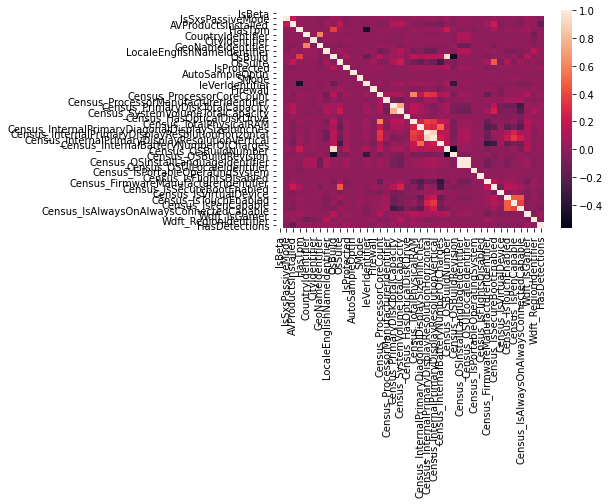

In [130]:
plt.plot(figsize=(24, 6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [131]:
corr

,IsBeta,IsSxsPassiveMode,AVProductsInstalled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,...,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
IsBeta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsSxsPassiveMode,NaN,1.000000,0.194570,0.014616,-0.011663,0.002879,-0.013946,-0.009678,0.047217,0.013298,...,-0.000506,-0.002718,0.018821,-0.011395,-0.005408,0.000211,-0.015723,0.034235,0.000429,-3.257679e-02
AVProductsInstalled,NaN,0.194570,1.000000,0.028585,-0.017886,0.008794,-0.043113,0.042066,0.009278,0.181638,...,-0.002368,0.062372,0.211584,-0.049422,-0.013127,-0.028298,-0.066124,0.027813,0.022208,-1.525251e-01
HasTpm,NaN,0.014616,0.028585,1.000000,0.003377,-0.008293,0.001967,-0.003424,0.368993,0.023038,...,0.000428,0.002540,0.085543,0.001300,0.030543,0.017461,0.027301,0.063772,-0.010079,6.810521e-03
CountryIdentifier,NaN,-0.011663,-0.017886,0.003377,1.000000,0.001778,0.598145,0.050125,0.011009,0.003327,...,-0.003912,-0.022298,-0.008773,-0.006992,0.001514,-0.015772,-0.007294,0.019077,-0.113229,5.842577e-03
CityIdentifier,NaN,0.002879,0.008794,-0.008293,0.001778,1.000000,-0.057942,0.029831,0.011437,0.007530,...,-0.001483,-0.021301,0.010367,-0.000312,-0.008571,0.003726,0.001313,0.002023,-0.052597,-5.738409e-03
GeoNameIdentifier,NaN,-0.013946,-0.043113,0.001967,0.598145,-0.057942,1.000000,-0.035784,-0.012989,-0.053274,...,0.004536,-0.000034,-0.057714,0.015810,0.018991,-0.006770,-0.009198,0.002289,-0.023467,7.188662e-04
LocaleEnglishNameIdentifier,NaN,-0.009678,0.042066,-0.003424,0.050125,0.029831,-0.035784,1.000000,-0.009399,0.067143,...,-0.002619,0.013844,0.025352,-0.024162,-0.052914,-0.064973,-0.033610,-0.001494,0.161433,1.334960e-02
OsBuild,NaN,0.047217,0.009278,0.368993,0.011009,0.011437,-0.012989,-0.009399,1.000000,-0.033150,...,0.002445,-0.057403,-0.003393,0.001206,-0.024133,0.031644,-0.060963,0.139576,-0.019320,2.336478e-02
OsSuite,NaN,0.013298,0.181638,0.023038,0.003327,0.007530,-0.053274,0.067143,-0.033150,1.000000,...,-0.000949,0.087678,0.457671,-0.080637,0.094209,-0.053499,0.056430,-0.015624,0.030856,-2.091155e-02


In [132]:
corr_cols = []
for col_1 in corr.columns:
    for col_2 in corr.columns:
        if col_1 != col_2:
            correlation = corr[col_1][col_2]
            if abs(correlation) >= 0.65:
                print("La columna ", col_1, " tiene una correlación con la columna ", col_2, "con un valor de ", correlation)
                corr_cols.append(col_1)

La columna  OsBuild  tiene una correlación con la columna  Census_OSBuildNumber con un valor de  0.9365384098997487
La columna  Census_PrimaryDiskTotalCapacity  tiene una correlación con la columna  Census_SystemVolumeTotalCapacity con un valor de  0.7579996676516382
La columna  Census_SystemVolumeTotalCapacity  tiene una correlación con la columna  Census_PrimaryDiskTotalCapacity con un valor de  0.7579996676516382
La columna  Census_InternalPrimaryDisplayResolutionHorizontal  tiene una correlación con la columna  Census_InternalPrimaryDisplayResolutionVertical con un valor de  0.8966151119894272
La columna  Census_InternalPrimaryDisplayResolutionVertical  tiene una correlación con la columna  Census_InternalPrimaryDisplayResolutionHorizontal con un valor de  0.8966151119894272
La columna  Census_OSBuildNumber  tiene una correlación con la columna  OsBuild con un valor de  0.9365384098997487
La columna  Census_OSInstallLanguageIdentifier  tiene una correlación con la columna  Census_O

Botaremos las columnas con altas correlaciones o que no nos sean útiles.

In [133]:
malware_data_train = malware_data_train.drop([
    "Census_OSUILocaleIdentifier",
    "Census_OSBuildNumber",
#     "Census_InternalPrimaryDisplayResolutionVertical",
    "Census_InternalPrimaryDisplayResolutionHorizontal",
#     Consideramos mas importante la capcidad del disco
    "Census_SystemVolumeTotalCapacity",
], axis = 1)

In [134]:
dummies_final = []
cols = malware_data_train.columns
for dumm in dummies:
    if dumm in cols:
       dummies_final.append(dumm)
dummies_final

['ProductName',
 'EngineVersion',
 'Platform',
 'Processor',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_ActivationChannel']

In [135]:
# Dummies
df = pd.get_dummies(malware_data_train, columns=dummies_final)

In [136]:
df.columns

Index(['IsBeta', 'IsSxsPassiveMode', 'AVProductsInstalled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite',
       ...
       'Census_OSWUAutoUpdateOptionsName_FullAuto',
       'Census_OSWUAutoUpdateOptionsName_Notify',
       'Census_OSWUAutoUpdateOptionsName_Off',
       'Census_OSWUAutoUpdateOptionsName_UNKNOWN',
       'Census_ActivationChannel_OEM:DM',
       'Census_ActivationChannel_OEM:NONSLP',
       'Census_ActivationChannel_Retail',
       'Census_ActivationChannel_Retail:TB:Eval',
       'Census_ActivationChannel_Volume:GVLK',
       'Census_ActivationChannel_Volume:MAK'],
      dtype='object', length=244)

In [137]:
df.to_csv('final_train.csv')  

In [138]:
df.select_dtypes(exclude=["number","bool_","object_"])

""
0
1
2
3
4
...
139393
139394
139395
139396
